In [1]:
import cv2

# take picture (no camera)
import matplotlib.pyplot as plt
import time

# start video inside notebook
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading

'''
cv2 is the only import you actually need (may need to pip install)
imports commented at top of code cells as needed
'''

## Start video and take picture when key pressed (most useful)

https://stackoverflow.com/questions/34588464/python-how-to-capture-image-from-webcam-on-click-using-opencv

In [21]:
'''
To exit new window press esc
To take picture press space
Can take multiple images
Each image saved as opencv_frame_[image number].jpg
'''

#import cv2

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.jpg".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()
cv2.waitKey(1) # apparently not needed but otherwise new window doesn't close on mac

opencv_frame_0.jpg written!
Escape hit, closing...


-1

## Take picture using camera (no video)

https://dev.to/azure/opencv-access-to-a-camera-in-a-jupyter-notebook-with-python-18mb

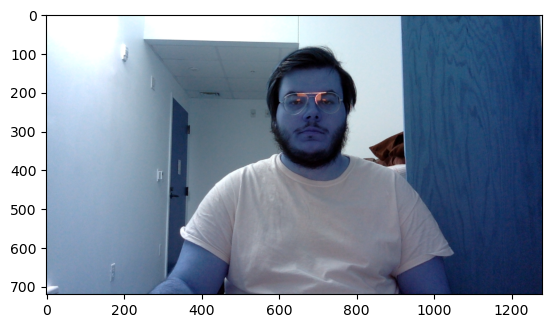

In [6]:
'''
Do not touch keyboard
Wait for camera to take picture
Single picture is saved as new_face.jpg
'''

#import matplotlib.pyplot as plt
#import cv2
#import time

camera = cv2.VideoCapture(0)
time.sleep(5) #prevents image from being too dark

ret, frame=camera.read()
plt.imshow(frame)

camera.release()
plt.savefig("new_face.jpg")

## Start video in new window (no image saved)

https://abauville.medium.com/display-your-live-webcam-feed-in-a-jupyter-notebook-using-opencv-d01eb75921d1

In [17]:
'''
To exit new window press q
'''

#import cv2

cap = cv2.VideoCapture(0)
cap.set(3,640) # adjust width
cap.set(4,480) # adjust height

while True:
    success, img = cap.read()
    cv2.imshow("Webcam", img) # This will open an independent window
    if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        cap.release()
        break
        
cv2.destroyAllWindows() 
cv2.waitKey(1) # normally unnecessary, but it fixes a bug on MacOS where the window doesn't close


-1

https://www.geeksforgeeks.org/python-opencv-capture-video-from-camera

In [18]:
'''
To exit new window press q
'''

#import cv2 
  
# define a video capture object 
vid = cv2.VideoCapture(0) 
  
while(True): 
      
    # Capture the video frame 
    # by frame 
    ret, frame = vid.read() 
  
    # Display the resulting frame 
    cv2.imshow('frame', frame) 
      
    # the 'q' button is set as the 
    # quitting button you may use any 
    # desired button of your choice 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
        
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 

cv2.waitKey(1)

-1

## Start video inside notebook (doesn't work well)

https://abauville.medium.com/display-your-live-webcam-feed-in-a-jupyter-notebook-using-opencv-d01eb75921d1

In [4]:
'''
#import matplotlib.pyplot as plt
#import cv2
#import numpy as np
#from IPython.display import display, Image
#import ipywidgets as widgets
#import threading

# Stop button
# ================
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)


# Display function
# ================
def view(button):
    cap = cv2.VideoCapture(0)
    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        frame = cv2.flip(frame, 1) # if your camera reverses your image
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)

            
# Run
# ================
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()
'''

"\n#import matplotlib.pyplot as plt\n#import cv2\n#import numpy as np\n#from IPython.display import display, Image\n#import ipywidgets as widgets\n#import threading\n\n# Stop button\n# ================\nstopButton = widgets.ToggleButton(\n    value=False,\n    description='Stop',\n    disabled=False,\n    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''\n    tooltip='Description',\n    icon='square' # (FontAwesome names without the `fa-` prefix)\n)\n\n\n# Display function\n# ================\ndef view(button):\n    cap = cv2.VideoCapture(0)\n    display_handle=display(None, display_id=True)\n    i = 0\n    while True:\n        _, frame = cap.read()\n        frame = cv2.flip(frame, 1) # if your camera reverses your image\n        _, frame = cv2.imencode('.jpeg', frame)\n        display_handle.update(Image(data=frame.tobytes()))\n        if stopButton.value==True:\n            cap.release()\n            display_handle.update(None)\n\n            \n# Run\n# ==========